In [110]:
%matplotlib inline

In [108]:
import matplotlib.pyplot as plt
import sympy as sym

In [85]:
class S(sym.Function):
    """Matching function"""
    
    is_real = True
    
    @classmethod
    def eval(cls, x):
        """We require the S(0)=0 and S(1)=1"""
        if x.is_Number and x is sym.S.Zero:
            return sym.S.Zero
        elif x.is_Number and x is sym.S.One:
            return sym.S.One


# 1M1F model

In [253]:
def M_dot(M, f, S, PiaA, PiAA, Piaa, PiAa):
    """Equation of motion for share of males carrying GA."""
    return 0.5 * S(f) - 0.5 * M
        
def f_dot(M, f, S, PiaA, PiAA, Piaa, PiAa):
    """Equation of motion for share of female offspring carrying GA."""
    num = (PiAA - 0.5 * (PiAa + PiaA)) * M * S(f) + 0.5 * PiaA * M + 0.5 * PiAa * S(f)
    denom = ((PiAA + Piaa) - (PiAa + PiaA)) * M * S(f) + (PiaA - Piaa) * M + (PiAa - Piaa) * S(f) + Piaa 
    return (num / denom) - f
    

In [254]:
M, f = sym.symbols('M, f')
PiaA, PiAA, Piaa, PiAa = sym.symbols('PiaA, PiAA, Piaa, PiAa')

In [255]:
rhs = sym.Matrix([M_dot(M, f, S, PiaA, PiAA, Piaa, PiAa),
                  f_dot(M, f, S, PiaA, PiAA, Piaa, PiAa)])

rhs_jac = rhs.jacobian([M, f])

## Equilibrium with $M^*=f^*=0$

In [261]:
# will raise AssertionError is false
assert M_dot(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0
assert f_dot(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0

In [257]:
rhs_jac.subs({M: 0, f: 0}).trace()

0.5*PiAa*Subs(Derivative(S(f), f), (f,), (0,))/Piaa - 1.5

From Routh-Hurwitz Criterion we know that necessary and sufficient conditions for stability of the $M^*=f^*=0$ equilibrium are...

\begin{align}
    Tr(\mathcal{J}) \equiv& \frac{\Pi_{Aa}}{2\Pi_{aa}}S'(0) - \frac{3}{2} < 0 \\
    &\frac{\Pi_{Aa}}{\Pi_{aa}}S'(0) < 3 \\
    &S'(0) < \frac{3\Pi_{aa}}{\Pi_{Aa}}
\end{align}

In [262]:
rhs_jac.subs({M: 0, f: 0}).det()

-0.25*PiAa*Subs(Derivative(S(f), f), (f,), (0,))/Piaa - 0.25*PiaA*Subs(Derivative(S(f), f), (f,), (0,))/Piaa + 0.5

...and...

\begin{align}
    det(\mathcal{J})\equiv& -\frac{\Pi_{Aa}S'(0)}{4\Pi_{aa}} - \frac{\Pi_{aA}S'(0)}{4\Pi_{aa}} + \frac{1}{2} > 0 \\
    &-\bigg(\frac{\Pi_{Aa} + \Pi_{aA}}{2\Pi_{aa}}\bigg)S'(0) + 1 > 0 \\
    &\bigg(\frac{\Pi_{Aa} + \Pi_{aA}}{2\Pi_{aa}}\bigg)S'(0) < 1 \\
    &S'(0) < \frac{2\Pi_{aa}}{\Pi_{Aa} + \Pi_{aA}}.
\end{align}

Can show that...

$$ \frac{2\Pi_{aa}}{\Pi_{Aa} + \Pi_{aA}} < \frac{3\Pi_{aa}}{\Pi_{Aa}} $$

..and therefore we have that...

$$ S'(0) < \frac{2\Pi_{aa}}{\Pi_{Aa} + \Pi_{aA}} $$

...is both necessary and sufficient for local stability of equilibrium.

## Equilibrium with $M^*=f^*=1$

In [209]:
# will raise AssertionError is false
assert M_dot(1, 1, S, PiaA, PiAA, Piaa, PiAa) == 0
assert f_dot(1, 1, S, PiaA, PiAA, Piaa, PiAa) == 0

In [217]:
rhs_jac.subs({M: 1, f: 1}).trace()

-1.5 + (0.5*PiAa*Subs(Derivative(S(x), x), (x,), (1,)) + (PiAA - 0.5*PiAa - 0.5*PiaA)*Subs(Derivative(S(f), f), (f,), (1,)))/PiAA + (-(PiAa - Piaa)*Subs(Derivative(S(x), x), (x,), (1,)) - (PiAA - PiAa - PiaA + Piaa)*Subs(Derivative(S(f), f), (f,), (1,)))/PiAA

Necessary and sufficient conditions for stability of the $M^*=f^*=1$ equilibrium are...

\begin{align}
    Tr(\mathcal{J})\equiv&-\frac{3}{2} + \frac{0.5\Pi_{Aa}S'(1) + (\Pi_{AA} - 0.5\Pi_{Aa} - 0.5\Pi_{aA})S'(1)}{\Pi_{AA}} + \frac{-(\Pi_{Aa} - \Pi_{aa})S'(1) - (\Pi_{AA} - \Pi_{Aa} - \Pi_{aA} + \Pi_{aa})S'(1)}{\Pi_{AA}} < 0 \\
    &\frac{\Pi_{aA}}{2\Pi_{AA}}S'(1) < \frac{3}{2} \\
    &\frac{\Pi_{aA}}{\Pi_{AA}}S'(1) < 3 \\
    &S'(1) < \frac{3\Pi_{AA}}{\Pi_{aA}} 
\end{align}

In [218]:
rhs_jac.subs({M: 1, f: 1}).det()

0.5 - 0.25*PiAa*Subs(Derivative(S(f), f), (f,), (1,))/PiAA - 0.25*PiaA*Subs(Derivative(S(f), f), (f,), (1,))/PiAA

...and...

\begin{align}
    det(\mathcal{J})\equiv&\frac{1}{2} - \frac{\Pi_{Aa}}{4\Pi_{AA}}S'(1) - \frac{\Pi_{aA}}{4\Pi_{AA}}S'(1) > 0 \\
    &1 - \bigg(\frac{\Pi_{Aa} + \Pi_{aA}}{2\Pi_{AA}}\bigg)S'(1) > 0 \\
    &\bigg(\frac{\Pi_{Aa} + \Pi_{aA}}{2\Pi_{AA}}\bigg)S'(1) < 1 \\
    &S'(1) < \frac{2\Pi_{AA}}{\Pi_{Aa} + \Pi_{aA}}
\end{align}

Can show that...

$$ \frac{2\Pi_{AA}}{\Pi_{Aa} + \Pi_{aA}} < \frac{3\Pi_{AA}}{\Pi_{aA}} $$

..and therefore we have that...

$$ S'(1) < \frac{2\Pi_{AA}}{\Pi_{Aa} + \Pi_{aA}} $$

...is both necessary and sufficient for local stability of equilibrium.

## Interior equilibrium

Existence of interior equilibria requires that...

\begin{align}
    S'(0) >& \frac{2\Pi_{aa}}{\Pi_{Aa} + \Pi_{aA}} \\
    S'(1) >& \frac{2\Pi_{AA}}{\Pi_{Aa} + \Pi_{aA}}.
\end{align}

...unfortunately, these interior equilibria may not be stable (in which case the attractor of the system is a limit cycle).  Need to characterize stability conditions for interior equilibrium in order to divide phase space between fixed points and limit cycles.

In [283]:
# any interior equilibrium will have M^* = S(f^*)!
rhs_jac.subs({M: S(f)}).trace().simplify()

((0.5*PiAa - (-PiAA + 0.5*PiAa + 0.5*PiaA)*S(f))*(Piaa + (PiAa - Piaa)*S(f) + (PiaA - Piaa)*S(f) + (PiAA - PiAa - PiaA + Piaa)*S(f)**2)*Derivative(S(f), f) - (0.5*PiAa + 0.5*PiaA + (PiAA - 0.5*PiAa - 0.5*PiaA)*S(f))*(PiAa - Piaa + (PiAA - PiAa - PiaA + Piaa)*S(f))*S(f)*Derivative(S(f), f) - 1.5*(Piaa + (PiAa - Piaa)*S(f) + (PiaA - Piaa)*S(f) + (PiAA - PiAa - PiaA + Piaa)*S(f)**2)**2)/(Piaa + (PiAa - Piaa)*S(f) + (PiaA - Piaa)*S(f) + (PiAA - PiAa - PiaA + Piaa)*S(f)**2)**2

In [306]:
numer, denom = sym.fraction(rhs_jac.subs({M: S(f)}).trace().simplify())

In [310]:
denom

(Piaa + (PiAa - Piaa)*S(f) + (PiaA - Piaa)*S(f) + (PiAA - PiAa - PiaA + Piaa)*S(f)**2)**2

Note that denominator above is always positive. Thus in order to sign the expression for $Tr(\mathcal{J})$ we need only concern ourselves with the sign of the numerator.

In [308]:
numer

(0.5*PiAa - (-PiAA + 0.5*PiAa + 0.5*PiaA)*S(f))*(Piaa + (PiAa - Piaa)*S(f) + (PiaA - Piaa)*S(f) + (PiAA - PiAa - PiaA + Piaa)*S(f)**2)*Derivative(S(f), f) - (0.5*PiAa + 0.5*PiaA + (PiAA - 0.5*PiAa - 0.5*PiaA)*S(f))*(PiAa - Piaa + (PiAA - PiAa - PiaA + Piaa)*S(f))*S(f)*Derivative(S(f), f) - 1.5*(Piaa + (PiAa - Piaa)*S(f) + (PiaA - Piaa)*S(f) + (PiAA - PiAa - PiaA + Piaa)*S(f)**2)**2

In [324]:
# factor into a fourth order polynomial in S(f)...
numer = sym.poly(numer.factor(), S(f))

In [325]:
# try and factor/simplify the expressions for the coefs
[coef.factor().simplify() for coef in numer.all_coeffs()]

[-3.0*(0.5*PiAA - 0.5*PiAa - 0.5*PiaA + 0.5*Piaa)**2,
 -3.0*(1.0*PiAa + 1.0*PiaA - 2.0*Piaa)*(PiAA - PiAa - PiaA + Piaa),
 0.5*PiAA*PiaA*Derivative(S(f), f) - 1.0*PiAA*Piaa*Derivative(S(f), f) - 3.0*PiAA*Piaa - 1.5*PiAa**2 - 3.0*PiAa*PiaA + 0.5*PiAa*Piaa*Derivative(S(f), f) + 9.0*PiAa*Piaa - 1.5*PiaA**2 + 9.0*PiaA*Piaa - 9.0*Piaa**2,
 Piaa*(1.0*PiAA*Derivative(S(f), f) - 1.0*PiAa*Derivative(S(f), f) - 3.0*PiAa - 3.0*PiaA + 6.0*Piaa),
 Piaa*(0.5*PiAa*Derivative(S(f), f) - 1.5*Piaa)]

For local stability of equilibrium we need the sign of the numerator to be negative. Sufficient condition for this is that all coefficients are negative. Note that [necessary and sufficient conditions exist](https://en.wikipedia.org/wiki/Quartic_function) (but are horrible!).

After a bit re-arranging of the above coefficients we can define...

\begin{align}
    A \equiv& -\frac{3}{4}\big((\Pi_{AA} + \Pi_{aa}) - (\Pi_{Aa} + \Pi_{aA})\big)^2 \\
    B \equiv& -3\big((\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{aa}\big)\big((\Pi_{AA} + \Pi_{aa}) -  (\Pi_{Aa} + \Pi_{aA})\big) \\
    C \equiv& %\frac{1}{2}\Pi_{AA}\Pi_{aA}S'(f) - \Pi_{AA}\Pi_{aa}S'(f) - 3\Pi_{AA}\Pi_{aa} - \frac{3}{2}\Pi_{Aa}^2 - 3\Pi_{Aa}\Pi_{aA} + \frac{1}{2}\Pi_{Aa}\Pi_{aa}S'(f) + 9\Pi_{Aa}\Pi_{aa} - \frac{3}{2}\Pi_{aA}^2 + 9\Pi_{aA}\Pi_{aa} - 9\Pi_{aa}^2 \\
    %& \bigg(\frac{1}{2}\Pi_{AA}\Pi_{aA} - \Pi_{AA}\Pi_{aa} + \frac{1}{2}\Pi_{Aa}\Pi_{aa}\bigg)S'(f) - 3\Pi_{AA}\Pi_{aa} - \frac{3}{2}\Pi_{Aa}^2 - 3\Pi_{Aa}\Pi_{aA} + 9\Pi_{Aa}\Pi_{aa} - \frac{3}{2}\Pi_{aA}^2 + 9\Pi_{aA}\Pi_{aa} - 9\Pi_{aa}^2 \\
    %& \bigg(\big(\Pi_{AA} - \frac{1}{2}\Pi_{Aa}\big)\big(\frac{1}{2}\Pi_{aA} - \Pi_{aa}\big) + \frac{1}{4}\Pi_{Aa}\Pi_{aA}\bigg)S'(f) - 3\bigg(\Pi_{AA}\Pi_{aa} + \frac{1}{2}\big(\Pi_{Aa} + \Pi_{aA}\big)^2 - 3\Pi_{Aa}\Pi_{aa} - 3\Pi_{aA}\Pi_{aa} + 3\Pi_{aa}^2\bigg) \\
    \bigg(\big(\Pi_{AA} - \frac{1}{2}\Pi_{Aa}\big)\big(\frac{1}{2}\Pi_{aA} - \Pi_{aa}\big) + \frac{1}{4}\Pi_{Aa}\Pi_{aA}\bigg)S'(f) - 3\bigg(\frac{1}{2}\big(\Pi_{Aa} + \Pi_{aA}\big)^2 + \Pi_{aa}\big(\Pi_{AA} - 3(\Pi_{Aa} + \Pi_{aA} - \Pi_{aa})\big)\bigg) \\
    D \equiv& \Pi_{aa}\bigg(\big(\Pi_{AA} - \Pi_{Aa}\big)S'(f) - 3\big((\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{aa}\big)\bigg) \\
    E \equiv& \Pi_{aa}\bigg(\frac{1}{2}\Pi_{Aa}S'(f) - \frac{3}{2}\Pi_{aa}\bigg)
\end{align}

...sufficient conditions for $Tr(\mathcal{J})$ are that $A, B, C, D, E < 0$.

Which yields...

\begin{align}
    A <&0 \\
    B <&0 \iff 2\Pi_{aa} < \Pi_{Aa} + \Pi_{aA} < \Pi_{AA} + \Pi_{aa} \\
    C <&0 \iff S'(f) < \frac{6\big(\Pi_{Aa} + \Pi_{aA}\big)^2 + 12\Pi_{aa}\big(\Pi_{AA} - 3(\Pi_{Aa} + \Pi_{aA} - \Pi_{aa})\big)}{\big(2\Pi_{AA} -\Pi_{Aa}\big)\big(\Pi_{aA} - 2\Pi_{aa}\big) + \Pi_{Aa}\Pi_{aA}} \\
    D <&0 \iff S'(f) < \frac{3\big((\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{aa}\big)}{\Pi_{AA} - \Pi_{Aa}} \\
    E <&0 \iff S'(f) < \frac{3\Pi_{aa}}{\Pi_{Aa}}
\end{align}

...surely it must be the case that one of the conditions for $S'(f)$ is "tougher" than the others!

In [268]:
rhs_jac.subs({M: S(f)}).det().simplify()

(0.5*PiAA**2*S(f)**4 - 1.0*PiAA*PiAa*S(f)**4 + 1.0*PiAA*PiAa*S(f)**3 - 0.25*PiAA*PiAa*S(f)**2*Derivative(S(f), f) - 1.0*PiAA*PiaA*S(f)**4 + 1.0*PiAA*PiaA*S(f)**3 - 0.25*PiAA*PiaA*S(f)**2*Derivative(S(f), f) + 1.0*PiAA*Piaa*S(f)**4 - 2.0*PiAA*Piaa*S(f)**3 + 1.0*PiAA*Piaa*S(f)**2*Derivative(S(f), f) + 1.0*PiAA*Piaa*S(f)**2 - 1.0*PiAA*Piaa*S(f)*Derivative(S(f), f) + 0.5*PiAa**2*S(f)**4 - 1.0*PiAa**2*S(f)**3 + 0.5*PiAa**2*S(f)**2 + 1.0*PiAa*PiaA*S(f)**4 - 2.0*PiAa*PiaA*S(f)**3 + 1.0*PiAa*PiaA*S(f)**2 - 1.0*PiAa*Piaa*S(f)**4 + 3.0*PiAa*Piaa*S(f)**3 - 0.25*PiAa*Piaa*S(f)**2*Derivative(S(f), f) - 3.0*PiAa*Piaa*S(f)**2 + 0.5*PiAa*Piaa*S(f)*Derivative(S(f), f) + 1.0*PiAa*Piaa*S(f) - 0.25*PiAa*Piaa*Derivative(S(f), f) + 0.5*PiaA**2*S(f)**4 - 1.0*PiaA**2*S(f)**3 + 0.5*PiaA**2*S(f)**2 - 1.0*PiaA*Piaa*S(f)**4 + 3.0*PiaA*Piaa*S(f)**3 - 0.25*PiaA*Piaa*S(f)**2*Derivative(S(f), f) - 3.0*PiaA*Piaa*S(f)**2 + 0.5*PiaA*Piaa*S(f)*Derivative(S(f), f) + 1.0*PiaA*Piaa*S(f) - 0.25*PiaA*Piaa*Derivative(S(f), f) 

In [328]:
numer, denom = sym.fraction(rhs_jac.subs({M: S(f)}).det().simplify())

In [329]:
numer

0.5*PiAA**2*S(f)**4 - 1.0*PiAA*PiAa*S(f)**4 + 1.0*PiAA*PiAa*S(f)**3 - 0.25*PiAA*PiAa*S(f)**2*Derivative(S(f), f) - 1.0*PiAA*PiaA*S(f)**4 + 1.0*PiAA*PiaA*S(f)**3 - 0.25*PiAA*PiaA*S(f)**2*Derivative(S(f), f) + 1.0*PiAA*Piaa*S(f)**4 - 2.0*PiAA*Piaa*S(f)**3 + 1.0*PiAA*Piaa*S(f)**2*Derivative(S(f), f) + 1.0*PiAA*Piaa*S(f)**2 - 1.0*PiAA*Piaa*S(f)*Derivative(S(f), f) + 0.5*PiAa**2*S(f)**4 - 1.0*PiAa**2*S(f)**3 + 0.5*PiAa**2*S(f)**2 + 1.0*PiAa*PiaA*S(f)**4 - 2.0*PiAa*PiaA*S(f)**3 + 1.0*PiAa*PiaA*S(f)**2 - 1.0*PiAa*Piaa*S(f)**4 + 3.0*PiAa*Piaa*S(f)**3 - 0.25*PiAa*Piaa*S(f)**2*Derivative(S(f), f) - 3.0*PiAa*Piaa*S(f)**2 + 0.5*PiAa*Piaa*S(f)*Derivative(S(f), f) + 1.0*PiAa*Piaa*S(f) - 0.25*PiAa*Piaa*Derivative(S(f), f) + 0.5*PiaA**2*S(f)**4 - 1.0*PiaA**2*S(f)**3 + 0.5*PiaA**2*S(f)**2 - 1.0*PiaA*Piaa*S(f)**4 + 3.0*PiaA*Piaa*S(f)**3 - 0.25*PiaA*Piaa*S(f)**2*Derivative(S(f), f) - 3.0*PiaA*Piaa*S(f)**2 + 0.5*PiaA*Piaa*S(f)*Derivative(S(f), f) + 1.0*PiaA*Piaa*S(f) - 0.25*PiaA*Piaa*Derivative(S(f), f) +

In [330]:
# factor into a fourth order polynomial in S(f)...
numer = sym.poly(numer.factor(), S(f))

In [331]:
numer

Poly((0.5*PiAA**2 - 1.0*PiAA*PiAa - 1.0*PiAA*PiaA + 1.0*PiAA*Piaa + 0.5*PiAa**2 + 1.0*PiAa*PiaA - 1.0*PiAa*Piaa + 0.5*PiaA**2 - 1.0*PiaA*Piaa + 0.5*Piaa**2)*S(f)**4 + (1.0*PiAA*PiAa + 1.0*PiAA*PiaA - 2.0*PiAA*Piaa - 1.0*PiAa**2 - 2.0*PiAa*PiaA + 3.0*PiAa*Piaa - 1.0*PiaA**2 + 3.0*PiaA*Piaa - 2.0*Piaa**2)*S(f)**3 + (-0.25*PiAA*PiAa*Derivative(S(f), f) - 0.25*PiAA*PiaA*Derivative(S(f), f) + 1.0*PiAA*Piaa*Derivative(S(f), f) + 1.0*PiAA*Piaa + 0.5*PiAa**2 + 1.0*PiAa*PiaA - 0.25*PiAa*Piaa*Derivative(S(f), f) - 3.0*PiAa*Piaa + 0.5*PiaA**2 - 0.25*PiaA*Piaa*Derivative(S(f), f) - 3.0*PiaA*Piaa + 3.0*Piaa**2)*S(f)**2 + (-1.0*PiAA*Piaa*Derivative(S(f), f) + 0.5*PiAa*Piaa*Derivative(S(f), f) + 1.0*PiAa*Piaa + 0.5*PiaA*Piaa*Derivative(S(f), f) + 1.0*PiaA*Piaa - 2.0*Piaa**2)*S(f) - 0.25*PiAa*Piaa*Derivative(S(f), f) - 0.25*PiaA*Piaa*Derivative(S(f), f) + 0.5*Piaa**2, S(f), domain='RR[Derivative(S(f), f),PiAA,PiAa,PiaA,Piaa]')

In [332]:
# try and factor/simplify the expressions for the coefs
[coef.factor().simplify() for coef in numer.all_coeffs()]

[1.0*(0.5*PiAA - 0.5*PiAa - 0.5*PiaA + 0.5*Piaa)**2,
 1.0*(1.0*PiAa + 1.0*PiaA - 2.0*Piaa)*(PiAA - PiAa - PiaA + Piaa),
 -0.25*PiAA*PiAa*Derivative(S(f), f) - 0.25*PiAA*PiaA*Derivative(S(f), f) + 1.0*PiAA*Piaa*Derivative(S(f), f) + 1.0*PiAA*Piaa + 0.5*PiAa**2 + 1.0*PiAa*PiaA - 0.25*PiAa*Piaa*Derivative(S(f), f) - 3.0*PiAa*Piaa + 0.5*PiaA**2 - 0.25*PiaA*Piaa*Derivative(S(f), f) - 3.0*PiaA*Piaa + 3.0*Piaa**2,
 Piaa*(-1.0*PiAA*Derivative(S(f), f) + 0.5*PiAa*Derivative(S(f), f) + 1.0*PiAa + 0.5*PiaA*Derivative(S(f), f) + 1.0*PiaA - 2.0*Piaa),
 Piaa*(-0.25*PiAa*Derivative(S(f), f) - 0.25*PiaA*Derivative(S(f), f) + 0.5*Piaa)]

In [292]:
denom

1.0*PiAA**2*S(f)**4 - 2.0*PiAA*PiAa*S(f)**4 + 2.0*PiAA*PiAa*S(f)**3 - 2.0*PiAA*PiaA*S(f)**4 + 2.0*PiAA*PiaA*S(f)**3 + 2.0*PiAA*Piaa*S(f)**4 - 4.0*PiAA*Piaa*S(f)**3 + 2.0*PiAA*Piaa*S(f)**2 + 1.0*PiAa**2*S(f)**4 - 2.0*PiAa**2*S(f)**3 + 1.0*PiAa**2*S(f)**2 + 2.0*PiAa*PiaA*S(f)**4 - 4.0*PiAa*PiaA*S(f)**3 + 2.0*PiAa*PiaA*S(f)**2 - 2.0*PiAa*Piaa*S(f)**4 + 6.0*PiAa*Piaa*S(f)**3 - 6.0*PiAa*Piaa*S(f)**2 + 2.0*PiAa*Piaa*S(f) + 1.0*PiaA**2*S(f)**4 - 2.0*PiaA**2*S(f)**3 + 1.0*PiaA**2*S(f)**2 - 2.0*PiaA*Piaa*S(f)**4 + 6.0*PiaA*Piaa*S(f)**3 - 6.0*PiaA*Piaa*S(f)**2 + 2.0*PiaA*Piaa*S(f) + 1.0*Piaa**2*S(f)**4 - 4.0*Piaa**2*S(f)**3 + 6.0*Piaa**2*S(f)**2 - 4.0*Piaa**2*S(f) + 1.0*Piaa**2

We can factor the denominator to see that it will always be strictly positive...

In [293]:
denom.factor()

1.0*(1.0*PiAA*S(f)**2 - 1.0*PiAa*S(f)**2 + 1.0*PiAa*S(f) - 1.0*PiaA*S(f)**2 + 1.0*PiaA*S(f) + 1.0*Piaa*S(f)**2 - 2.0*Piaa*S(f) + 1.0*Piaa)**2

...and therefore to sign the expression for $det(\mathcal{J})$ we need only concern ourselves with the numerator of this expression.

In [295]:
numer

0.5*PiAA**2*S(f)**4 - 1.0*PiAA*PiAa*S(f)**4 + 1.0*PiAA*PiAa*S(f)**3 - 0.25*PiAA*PiAa*S(f)**2*Derivative(S(f), f) - 1.0*PiAA*PiaA*S(f)**4 + 1.0*PiAA*PiaA*S(f)**3 - 0.25*PiAA*PiaA*S(f)**2*Derivative(S(f), f) + 1.0*PiAA*Piaa*S(f)**4 - 2.0*PiAA*Piaa*S(f)**3 + 1.0*PiAA*Piaa*S(f)**2*Derivative(S(f), f) + 1.0*PiAA*Piaa*S(f)**2 - 1.0*PiAA*Piaa*S(f)*Derivative(S(f), f) + 0.5*PiAa**2*S(f)**4 - 1.0*PiAa**2*S(f)**3 + 0.5*PiAa**2*S(f)**2 + 1.0*PiAa*PiaA*S(f)**4 - 2.0*PiAa*PiaA*S(f)**3 + 1.0*PiAa*PiaA*S(f)**2 - 1.0*PiAa*Piaa*S(f)**4 + 3.0*PiAa*Piaa*S(f)**3 - 0.25*PiAa*Piaa*S(f)**2*Derivative(S(f), f) - 3.0*PiAa*Piaa*S(f)**2 + 0.5*PiAa*Piaa*S(f)*Derivative(S(f), f) + 1.0*PiAa*Piaa*S(f) - 0.25*PiAa*Piaa*Derivative(S(f), f) + 0.5*PiaA**2*S(f)**4 - 1.0*PiaA**2*S(f)**3 + 0.5*PiaA**2*S(f)**2 - 1.0*PiaA*Piaa*S(f)**4 + 3.0*PiaA*Piaa*S(f)**3 - 0.25*PiaA*Piaa*S(f)**2*Derivative(S(f), f) - 3.0*PiaA*Piaa*S(f)**2 + 0.5*PiaA*Piaa*S(f)*Derivative(S(f), f) + 1.0*PiaA*Piaa*S(f) - 0.25*PiaA*Piaa*Derivative(S(f), f) +

Start by combining like terms in order to express the numerator as a fourth order polynomial. We then ask under what conditions this fourth order polynomial must be strictly positive...

\begin{align}
    &\bigg[\frac{1}{2}\Pi_{AA}^2 - \Pi_{AA}\Pi_{Aa} - \Pi_{AA}\Pi_{aA} + \Pi_{AA}\Pi_{aa} + \frac{1}{2}\Pi_{Aa}^2 + \Pi_{Aa}\Pi_{aA} - \Pi_{Aa}\Pi_{aa} + \frac{1}{2}\Pi_{aA}^2 - \Pi_{aA}\Pi_{aa} + \frac{1}{2}\Pi_{aa}^2\bigg]S(f)^4 + \\
    &\bigg[\Pi_{AA}\Pi_{Aa} + \Pi_{AA}\Pi_{aA} - 2\Pi_{AA}\Pi_{aa} - \Pi_{Aa}^2 - 2\Pi_{Aa}\Pi_{aA} + 3\Pi_{Aa}\Pi_{aa} - \Pi_{aA}^2 + 3\Pi_{aA}\Pi_{aa} - 2\Pi_{aa}^2\bigg]S(f)^3 \\ + 
    &\bigg[\Pi_{AA}\Pi_{aa} - \frac{1}{4}\Pi_{AA}\Pi_{Aa}S'(f) - \frac{1}{4}\Pi_{AA}\Pi_{aA}S'(f) + \Pi_{AA}\Pi_{aa}S'(f)  + \frac{1}{2}\Pi_{Aa}^2 - \frac{1}{4}\Pi_{Aa}\Pi_{aa}S'(f) - 3\Pi_{Aa}\Pi_{aa} + \Pi_{Aa}\Pi_{aA} + \frac{1}{2}\Pi_{aA}^2 + 3\Pi_{aa}^2 - \frac{1}{4}\Pi_{aA}\Pi_{aa}S'(f) - 3\Pi_{aA}\Pi_{aa}\bigg]S(f)^2 +\\
    &\bigg[\frac{1}{2}\Pi_{Aa}\Pi_{aa}S'(f) - \Pi_{AA}\Pi_{aa}S'(f) + \Pi_{Aa}\Pi_{aa} + \frac{1}{2}\Pi_{aA}\Pi_{aa}S'(f) + \Pi_{aA}\Pi_{aa} - 2\Pi_{aa}^2\bigg]S(f) + \\
    &\bigg[\frac{1}{2}\Pi_{aa}^2 - \frac{1}{4}\Pi_{Aa}\Pi_{aa}S'(f) - \frac{1}{4}\Pi_{aA}\Pi_{aa}S'(f)\bigg] > 0
\end{align}

\begin{align}
    A \equiv& \bigg[\frac{1}{2}\Pi_{AA}^2 - \Pi_{AA}\Pi_{Aa} - \Pi_{AA}\Pi_{aA} + \Pi_{AA}\Pi_{aa} + \frac{1}{2}\Pi_{Aa}^2 + \Pi_{Aa}\Pi_{aA} - \Pi_{Aa}\Pi_{aa} + \frac{1}{2}\Pi_{aA}^2 - \Pi_{aA}\Pi_{aa} + \frac{1}{2}\Pi_{aa}^2\bigg] > 0 \\
    \iff & \big((\Pi_{AA} - \Pi_{Aa}) - (\Pi_{aA} - \Pi_{aa})\big)^2 > 0
\end{align}

\begin{align}
    B \equiv& \bigg[\Pi_{AA}\Pi_{Aa} + \Pi_{AA}\Pi_{aA} - 2\Pi_{AA}\Pi_{aa} - \Pi_{Aa}^2 - 2\Pi_{Aa}\Pi_{aA} + 3\Pi_{Aa}\Pi_{aa} - \Pi_{aA}^2 + 3\Pi_{aA}\Pi_{aa} - 2\Pi_{aa}^2\bigg] > 0\\
    \iff & \big((\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{aa}\big)\big((\Pi_{AA} + \Pi_{aa}) - (\Pi_{Aa} + \Pi_{aA})\big) > 0 \\
    \iff& 2\Pi_{aa} < \Pi_{Aa} + \Pi_{aA} < \Pi_{AA} + \Pi_{aa}
\end{align}

In [298]:
B = PiAA * PiAa + PiAA * PiaA - 2 * PiAA * Piaa - PiAa**2 - 2*PiAa * PiaA + 3 * PiAa * Piaa - PiaA**2 + 3 * PiaA * Piaa - 2 * Piaa**2

In [299]:
B.factor()

(PiAa + PiaA - 2*Piaa)*(PiAA - PiAa - PiaA + Piaa)

\begin{align}
    C \equiv& \Pi_{AA}\Pi_{aa} - \frac{1}{4}\Pi_{AA}\Pi_{Aa}S'(f) - \frac{1}{4}\Pi_{AA}\Pi_{aA}S'(f) + \Pi_{AA}\Pi_{aa}S'(f)  + \frac{1}{2}\Pi_{Aa}^2 - \frac{1}{4}\Pi_{Aa}\Pi_{aa}S'(f) - 3\Pi_{Aa}\Pi_{aa} + \Pi_{Aa}\Pi_{aA} + \frac{1}{2}\Pi_{aA}^2 + 3\Pi_{aa}^2 - \frac{1}{4}\Pi_{aA}\Pi_{aa}S'(f) - 3\Pi_{aA}\Pi_{aa} \\
    \iff& \bigg[\Pi_{AA}\Pi_{aa} - \frac{1}{4}(\Pi_{Aa} + \Pi_{aA})(\Pi_{AA} + \Pi_{aa})\bigg]S'(f) + 
\end{align}

In [301]:
S_prime = sym.symbols('S_prime')

In [304]:
b = PiAA * Piaa + 0.5 * PiAa**2 - 3 * PiAa * Piaa + PiAa * PiaA + 0.5 * PiaA**2 + 3 * Piaa**2 - 3 * PiaA * Piaa

In [302]:
C = PiAA * Piaa - 0.25 * PiAA * PiAa * S_prime - 0.25 * PiAA * PiaA * S_prime + PiAA * Piaa * S_prime + 0.5 * PiAa**2 - 0.25 * PiAa * Piaa * S_prime - 3 * PiAa * Piaa + PiAa * PiaA + 0.5 * PiaA**2 + 3 * Piaa**2 - 0.25 * PiaA * Piaa * S_prime - 3 * PiaA * Piaa

In [303]:
C.factor()

-1.0*(0.25*PiAA*PiAa*S_prime + 0.25*PiAA*PiaA*S_prime - 1.0*PiAA*Piaa*S_prime - 1.0*PiAA*Piaa - 0.5*PiAa**2 - 1.0*PiAa*PiaA + 0.25*PiAa*Piaa*S_prime + 3.0*PiAa*Piaa - 0.5*PiaA**2 + 0.25*PiaA*Piaa*S_prime + 3.0*PiaA*Piaa - 3.0*Piaa**2)

\begin{align}
    D \equiv & \frac{1}{2}\Pi_{Aa}\Pi_{aa}S'(f) - \Pi_{AA}\Pi_{aa}S'(f) + \Pi_{Aa}\Pi_{aa} + \frac{1}{2}\Pi_{aA}\Pi_{aa}S'(f) + \Pi_{aA}\Pi_{aa} - 2\Pi_{aa}^2 > 0 \\
    \iff& S'(f) < \frac{(\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{aa}}{\Pi_{AA} - \frac{1}{2}(\Pi_{Aa} + \Pi_{aA})} \\
    \iff& 2\Pi_{aa} < \Pi_{Aa} + \Pi_{aA} < 2 \Pi_{AA}
\end{align}

where the last line follows because $S'(f) > 0\ \forall\ f$.

\begin{align}
    E \equiv& \frac{1}{2}\Pi_{aa}^2 - \frac{1}{4}\Pi_{Aa}\Pi_{aa}S'(f) - \frac{1}{4}\Pi_{aA}\Pi_{aa}S'(f) > 0\\
    &\iff 2\Pi_{aa}^2 - \Pi_{aa}\big(\Pi_{Aa} + \Pi_{aA}\big)S'(f) > 0 \\
    &\iff 2\Pi_{aa} - \big(\Pi_{Aa} + \Pi_{aA}\big)S'(f) > 0 \\
    &\iff S'(f) < \frac{2\Pi_{aa}}{\Pi_{Aa} + \Pi_{aA}}
\end{align}

# 1X1X model

In [221]:
rhs_jac = f_dot(x, x, S, PiaA, PiAA, Piaa, PiAa).diff(x)

In [227]:
rhs_jac.subs({x: 0})

-1 + (0.5*PiAa*Subs(Derivative(S(x), x), (x,), (0,)) + 0.5*PiaA)/Piaa

Stability of the $x^*=0$ equilibrium requires that...

$$ \frac{\partial \dot{x}}{\partial x}\bigg|_{x=0} < 0$$

..taking the derivative yields...

\begin{align}
    \frac{\partial \dot{x}}{\partial x}\bigg|_{x=0} \equiv& -1 + \frac{0.5\Pi_{Aa}S'(0) + 0.5\Pi_{aA}}{\Pi_{aa}} < 0 \\
    &\frac{\Pi_{Aa}S'(0) + \Pi_{aA}}{2\Pi_{aa}} < 1 \\
    &\Pi_{Aa}S'(0) + \Pi_{aA} < 2\Pi_{aa} \\
    &\Pi_{Aa}S'(0) < 2\Pi_{aa} - \Pi_{aA} \\
    &S'(0) < \frac{2\Pi_{aa} - \Pi_{aA}}{\Pi_{Aa}} \\
\end{align}

In [228]:
rhs_jac.subs({x: 1})

-1 + (-PiAA + PiAa - (PiAa - Piaa)*Subs(Derivative(S(x), x), (x,), (1,)) - (PiAA - PiAa - PiaA + Piaa)*Subs(Derivative(S(x), x), (x,), (1,)))/PiAA + (PiAA + 0.5*PiAa*Subs(Derivative(S(x), x), (x,), (1,)) - 0.5*PiAa + (PiAA - 0.5*PiAa - 0.5*PiaA)*Subs(Derivative(S(x), x), (x,), (1,)))/PiAA

Stability of the $x^*=1$ equilibrium requires that...

$$ \frac{\partial \dot{x}}{\partial x}\bigg|_{x=1} < 0$$

...taking the derivative yields...

\begin{align}
    \frac{\partial \dot{x}}{\partial x}\bigg|_{x=1} \equiv& -1 + \frac{-\Pi_{AA} + \Pi_{Aa} - (\Pi_{Aa} - \Pi_{aa})S'(1) - (\Pi_{AA} - \Pi_{Aa} - \Pi_{aA} + \Pi_{aa})S'(1)}{\Pi_{AA}} + \frac{\Pi_{AA} + 0.5\Pi_{Aa}S'(1) - 0.5\Pi_{Aa} + (\Pi_{AA} - 0.5\Pi_{Aa} - 0.5\Pi_{aA})S'(1)}{\Pi_{AA}} < 0 \\
    &\frac{-\Pi_{AA} + \Pi_{Aa} - (\Pi_{AA} - \Pi_{aA})S'(1)}{\Pi_{AA}} + \frac{\Pi_{AA}  - 0.5\Pi_{Aa} + (\Pi_{AA} - 0.5\Pi_{aA})S'(1)}{\Pi_{AA}} < 1 \\
    &\frac{\Pi_{Aa} + \Pi_{aA}S'(1)}{2\Pi_{AA}} < 1 \\
    &S'(1) < \frac{2\Pi_{AA} - \Pi_{Aa}}{\Pi_{aA}}
\end{align}

# 1M2F model

In [243]:
def M_dot(M, f, S, PiaA, PiAA, Piaa, PiAa):
    return 0.5 * S(f)**2 + S(f) * (1 - S(f)) * (PiAa / (PiAa + PiaA)) - 0.5 * M

def f_dot(M, f, S, PiaA, PiAA, Piaa, PiAa):
    out = ((total_female_altruists(M, f, S, PiaA, PiAA, Piaa, PiAa) /
            total_offspring(M, f, S, PiaA, PiAA, Piaa, PiAa)) - f)
    return out

def total_female_altruists(M, f, S, PiaA, PiAA, Piaa, PiAa):
    total = (2 * PiAA * M * S(f)**2 +
             Piaa * M * (1 - S(f)**2) +
             (2 * PiAa + PiaA) * M * S(f) * (1 - S(f)) +
             PiAA * (1 - M) * S(f)**2 +
             PiAa * (1 - M) * S(f) * (1 - S(f)))
    return total

def total_offspring(M, f, S, PiaA, PiAA, Piaa, PiAa):
    total = (2 * PiAA * M * S(f)**2 +
             2 * Piaa * (1 - M) * (1 - S(f))**2 + 
             2 * (PiAa + PiaA) * M * S(f) * (1 - S(f)))
    return total


In [244]:
# check whether M=f=0 is an equilibrium...
assert M_dot(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0
assert f_dot(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0

In [245]:
# check whether M=f=1 is an equilibrium...
assert M_dot(1, 1, S, PiaA, PiAA, Piaa, PiAa) == 0
assert f_dot(1, 1, S, PiaA, PiAA, Piaa, PiAa) == 0

In [246]:
rhs = sym.Matrix([M_dot(M, f, S, PiaA, PiAA, Piaa, PiAa),
                  f_dot(M, f, S, PiaA, PiAA, Piaa, PiAa)])

In [247]:
rhs_jac = rhs.jacobian([M, f])

In [249]:
rhs_jac.subs({M: 0, f: 0}).trace()

PiAa*Subs(Derivative(S(f), f), (f,), (0,))/(2*Piaa) - 1.5

Note that $Tr(\mathcal{J})$ condition requires that...

\begin{align}
    %\frac{\Pi_{Aa} }{2\Pi_{aa}}S'(0) - \frac{3}{2} < 0\\
    %\frac{\Pi_{Aa} }{\Pi_{aa}}S'(0) < \frac{3}{1} \\
    S'(0) < \frac{3\Pi_{aa}}{\Pi_{Aa}} \\
\end{align}

In [250]:
rhs_jac.subs({M: 0, f: 0}).det()

-PiAa*Subs(Derivative(S(f), f), (f,), (0,))/(2*(PiAa + PiaA)) - 0.25*PiAa*Subs(Derivative(S(f), f), (f,), (0,))/Piaa + 0.5

...and $det(\mathcal{J})$ requires that...

\begin{align}
    %-\frac{\Pi_{Aa}}{2(\Pi_{Aa} + \Pi_{aA})}S'(0) - \frac{1}{4}\frac{\Pi_{Aa}}{\Pi_{aa}}S'(0) + \frac{1}{2} > 0 \\
    %-\bigg[\frac{2\Pi_{Aa}}{\Pi_{Aa} + \Pi_{aA}} + \frac{\Pi_{Aa}}{\Pi_{aa}}\bigg]S'(0) + 2 > 0 \\
   %\bigg[\frac{2\Pi_{Aa}}{\Pi_{Aa} + \Pi_{aA}} + \frac{\Pi_{Aa}}{\Pi_{aa}}\bigg]S'(0) < 2 \\
   %\bigg[\frac{2\Pi_{Aa}\Pi_{aa} + \Pi_{Aa}(\Pi_{Aa} + \Pi_{aA})}{\Pi_{aa}(\Pi_{Aa} + \Pi_{aA})}\bigg]S'(0) < 2 \\
   S'(0) < \frac{2\Pi_{aa}(\Pi_{Aa} + \Pi_{aA})}{2\Pi_{Aa}\Pi_{aa} + \Pi_{Aa}(\Pi_{Aa} + \Pi_{aA})}
\end{align}

Can show that...

$$\frac{2\Pi_{aa}(\Pi_{Aa} + \Pi_{aA})}{2\Pi_{Aa}\Pi_{aa} + \Pi_{Aa}(\Pi_{Aa} + \Pi_{aA})} < \frac{3\Pi_{aa}}{\Pi_{Aa}} $$ 

...and therefore necessary and sufficient condition for stability of $M^*=f^*=0$ is

$$    S'(0) < \frac{2\Pi_{aa}(\Pi_{Aa} + \Pi_{aA})}{2\Pi_{Aa}\Pi_{aa} + \Pi_{Aa}(\Pi_{Aa} + \Pi_{aA})}. $$

In [251]:
rhs_jac.subs({M: 1, f: 1}).trace()

-1.5 + (-4*PiAA*Subs(Derivative(S(f), f), (f,), (1,)) + (2*PiAa + 2*PiaA)*Subs(Derivative(S(f), f), (f,), (1,)))/(2*PiAA) + (4*PiAA*Subs(Derivative(S(f), f), (f,), (1,)) - 2*Piaa*Subs(Derivative(S(f), f), (f,), (1,)) - (2*PiAa + PiaA)*Subs(Derivative(S(f), f), (f,), (1,)))/(2*PiAA)

After a bit of algebra we can show that the $Tr(\mathcal{J})$ condition requires...

\begin{align}
    %-\frac{3}{2} + \frac{-4\Pi_{AA}S'(1) + (2\Pi_{Aa} + 2\Pi_{aA})S'(1)}{2\Pi_{AA}} + \frac{4\Pi_{AA}S'(1) - 2\Pi_{aa}S'(1) - (2\Pi_{Aa} + \Pi_{aA})S'(1)}{2\Pi_{AA}} < 0 \\
        -\frac{3}{2} - \frac{\Pi_{aa}}{\Pi_{AA}}S'(1) < 0
\end{align}

...which is always satisfied because $S'(1) > 0$.

In [252]:
rhs_jac.subs({M: 1, f: 1}).det()

-PiAa*Subs(Derivative(S(f), f), (f,), (1,))/(2*(PiAa + PiaA)) + 0.5*Subs(Derivative(S(f), f), (f,), (1,)) + 0.5 - 0.25*PiaA*Subs(Derivative(S(f), f), (f,), (1,))/PiAA + 0.5*Piaa*Subs(Derivative(S(f), f), (f,), (1,))/PiAA

Note that the $det(\mathcal{J})$ condition requires that...

\begin{align}
    \frac{-\Pi_{Aa}}{2(\Pi_{Aa} + \Pi_{aA})}S'(1) + \frac{1}{2}S'(1) + \frac{1}{2} - \frac{\Pi_{aA}}{4\Pi_{AA}}S'(1) + \frac{\Pi_{aa}}{2\Pi_{AA}}S'(1) > 0 \\
    \frac{-2\Pi_{Aa}}{\Pi_{Aa} + \Pi_{aA}}S'(1) + 2S'(1) + 2 - \frac{\Pi_{aA}}{\Pi_{AA}}S'(1) + \frac{2\Pi_{aa}}{\Pi_{AA}}S'(1) > 0 \\
    2 > \frac{2\Pi_{Aa}}{\Pi_{Aa} + \Pi_{aA}}S'(1) - 2S'(1) + \frac{\Pi_{aA}}{\Pi_{AA}}S'(1) - \frac{2\Pi_{aa}}{\Pi_{AA}}S'(1) \\
    2 > \bigg[\frac{2\Pi_{Aa}}{\Pi_{Aa} + \Pi_{aA}} + \frac{\Pi_{aA} - 2\Pi_{aa}}{\Pi_{AA}} - 2\bigg]S'(1) \\
    2 > \bigg[\frac{2\Pi_{Aa}\Pi_{AA} + (\Pi_{aA} - 2\Pi_{aa})(\Pi_{Aa} + \Pi_{aA})}{\Pi_{AA}(\Pi_{Aa} + \Pi_{aA})} - 2\bigg]S'(1) \\
    2 > \bigg[\frac{2\Pi_{Aa}\Pi_{AA} + (\Pi_{aA} - 2\Pi_{aa})(\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{AA}(\Pi_{Aa} + \Pi_{aA})}{\Pi_{AA}(\Pi_{Aa} + \Pi_{aA})}\bigg]S'(1) \\
    S'(1) < \frac{2\Pi_{AA}(\Pi_{Aa} + \Pi_{aA})}{2\Pi_{Aa}\Pi_{AA} + (\Pi_{aA} - 2\Pi_{aa})(\Pi_{Aa} + \Pi_{aA}) - 2\Pi_{AA}(\Pi_{Aa} + \Pi_{aA})}
\end{align}

...in order for the equilibrium to be locally stable.

# 1X2X model

In [98]:
def total_surviving_altruists(x, S, PiaA, PiAA, Piaa, PiAa):
    num_survivors = (2 * PiAA * x * S(x)**2 +
                     Piaa * x * (1 - S(x))**2 + 
                     (2 * PiAa + PiaA) * x * S(x) * (1 - S(x)) +
                     PiAA * (1 - x) * S(x)**2 + 
                     PiAa * (1 - x) * S(x) * (1 - S(x)))
    return num_survivors


def total_altruists(x, S, PiaA, PiAA, Piaa, PiAa):
    num_total = (2 * PiAA * x * S(x)**2 +
                 2 * Piaa * (1 - x) * (1 - S(x))**2 + 
                 2 * (PiAa + PiaA) * x * S(x) * (1 - S(x)))
    return num_total


In [99]:
def share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa):
    x_dot = ((total_surviving_altruists(x, S, PiaA, PiAA, Piaa, PiAa) /
              total_altruists(x, S, PiaA, PiAA, Piaa, PiAa)) - x)
    return x_dot

In [100]:
t, x = sym.symbols('t, x')

share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa)

-x + (2*PiAA*x*S(x)**2 + PiAA*(-x + 1)*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*S(x) + Piaa*x*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*x*S(x)**2 + 2*Piaa*(-x + 1)*(-S(x) + 1)**2 + x*(2*PiAa + 2*PiaA)*(-S(x) + 1)*S(x))

In [101]:
# unless I screwed up, x=0, 1 should both be fixed points!
assert share_altruists(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0
assert share_altruists(0, 1, S, PiaA, PiAA, Piaa, PiAa) == 0

In [102]:
rhs_jac = share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa).diff(x, 1)

In [127]:
rhs_jac

-1 + (4*PiAA*x*S(x)*Derivative(S(x), x) + 2*PiAA*(-x + 1)*S(x)*Derivative(S(x), x) + PiAA*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*Derivative(S(x), x) - PiAa*(-x + 1)*S(x)*Derivative(S(x), x) - PiAa*(-S(x) + 1)*S(x) - 2*Piaa*x*(-S(x) + 1)*Derivative(S(x), x) + Piaa*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*Derivative(S(x), x) - x*(2*PiAa + PiaA)*S(x)*Derivative(S(x), x) + (2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*x*S(x)**2 + 2*Piaa*(-x + 1)*(-S(x) + 1)**2 + x*(2*PiAa + 2*PiaA)*(-S(x) + 1)*S(x)) + (2*PiAA*x*S(x)**2 + PiAA*(-x + 1)*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*S(x) + Piaa*x*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*S(x))*(-4*PiAA*x*S(x)*Derivative(S(x), x) - 2*PiAA*S(x)**2 + 4*Piaa*(-x + 1)*(-S(x) + 1)*Derivative(S(x), x) + 2*Piaa*(-S(x) + 1)**2 - x*(2*PiAa + 2*PiaA)*(-S(x) + 1)*Derivative(S(x), x) + x*(2*PiAa + 2*PiaA)*S(x)*Derivative(S(x), x) - (2*PiAa + 2*PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*x*S(x)**2 + 2*Piaa*(-x + 1)*(-S(x) + 1)**2 + x*(2*PiAa + 2*PiaA)*(-S(x) + 1)*S(x))**2

In [103]:
rhs_jac.subs({x:0})

(PiAa*Subs(Derivative(S(x), x), (x,), (0,)) - Piaa)/(2*Piaa)

Stability condition for equilibrium at $x=0$...

\begin{align}
    %\frac{\Pi_{Aa}S'(0) + \Pi_{aa}}{2\Pi_{aa}} - 1 < 0 \\
    %\frac{\Pi_{Aa}S'(0) + \Pi_{aa}}{2\Pi_{aa}} < 1 \\
    %\Pi_{Aa}S'(0) + \Pi_{aa} < 2\Pi_{aa} \\
    %\Pi_{Aa}S'(0) < \Pi_{aa} \\
    S'(0) < \frac{\Pi_{aa}}{\Pi_{Aa}} \\
\end{align}

In [104]:
rhs_jac.subs({x:1}).simplify()

-3/2 + PiaA*Subs(Derivative(S(x), x), (x,), (1,))/(2*PiAA)

Stability condition for equilibrium at $x=1$...

\begin{align}
    %-\frac{3}{2} + \frac{\Pi_{aA}S'(1)}{2\Pi_{AA}} < 0 \\
    %\frac{\Pi_{aA}S'(1)}{2\Pi_{AA}} < \frac{3}{2} \\
    S'(1) < \frac{3\Pi_{AA}}{\Pi_{aA}} \\
\end{align}

### Example: Exponential matching

In [124]:
def exponential_matching(x, e=0.5):
    return x**(1 - e)

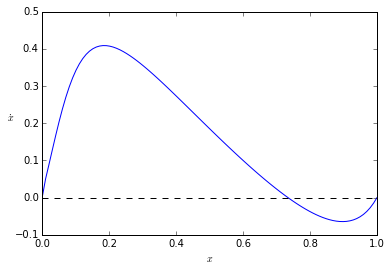

In [126]:
ts = np.linspace(0, 100, 100)
xs = np.linspace(0, 1, 100)
params = {'PiaA': 50, 'PiAA': 4, 'Piaa': 3, 'PiAa': 2}

plt.plot(xs, share_altruists(ts, xs, exponential_matching, **params))
plt.axhline(y=0, linestyle='dashed', color='k')
plt.ylabel(r'$\dot{x}$', rotation='horizontal')
plt.xlabel(r'$x$')
plt.show()